# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import requests
import json
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_sas('epcg19.sas7bdat')

In [3]:
df.head()

,ACADV,ACCAR,ACCCEP,ACCHG,ACDRG,ACEM,ACFPT,ACGRD,ACINT,ACLIC,...,WRKGP,WTRCHOC,WTREASN,WTREM,WTRLIC,WTROPPS,WTROT,WTRPERS,WTRSKL,WTSURVY
0,b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',...,b'Y',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',683.1451
1,b'N',b'N',b'Y',b'N',b'0',b'N',b'3',b'N',b'Y',b'N',...,b'N',b'N',b'1',b'N',b'Y',b'Y',b'N',b'Y',b'Y',64.5046
2,b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',...,b'Y',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',2139.9825
3,b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',...,b'Y',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',272.8289
4,b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',b'L',...,b'Y',b'N',b'1',b'N',b'N',b'N',b'N',b'N',b'Y',414.3448


In [4]:
df.shape

(92537, 517)

In [5]:
df.isnull().sum()

ACADV      0
ACCAR      0
ACCCEP     0
ACCHG      0
ACDRG      0
          ..
WTROPPS    0
WTROT      0
WTRPERS    0
WTRSKL     0
WTSURVY    0
Length: 517, dtype: int64

In [6]:
df1 = df[["AGE", "AGEGR", "ASDGRI", "CLIC", "CTZN", "GENDER", "MRDG","NBAMEMG","NDGMEMG", "N2OCPRMG", "RACETHM", "SALARY"]].copy()
df1.head()

,AGE,AGEGR,ASDGRI,CLIC,CTZN,GENDER,MRDG,NBAMEMG,NDGMEMG,N2OCPRMG,RACETHM,SALARY
0,36.0,35.0,b'N',b'N',b'1',b'M',b'2',b'1',b'1',b'1',b'3',50000.0
1,38.0,35.0,b'Y',b'Y',b'1',b'F',b'2',b'4',b'7',b'7',b'5',24000.0
2,42.0,40.0,b'N',b'N',b'1',b'M',b'2',b'4',b'7',b'7',b'4',200000.0
3,48.0,45.0,b'N',b'N',b'1',b'F',b'1',b'2',b'2',b'2',b'5',38147.0
4,37.0,35.0,b'N',b'Y',b'1',b'F',b'4',b'4',b'7',b'7',b'1',70000.0


In [7]:
df1[["AGE", "AGEGR", "ASDGRI", "CLIC", "CTZN", "GENDER", "MRDG","NBAMEMG", "NDGMEMG", "N2OCPRMG", "RACETHM", "SALARY"]].shape

(92537, 12)

# Data Cleaning

In [134]:
df1["ASDGRI"].value_counts()

0    62866
1    10763
Name: ASDGRI, dtype: int64

In [135]:
df1['ASDGRI'].replace({bytes('N', 'ascii'):0, bytes('Y', 'ascii'):1}, inplace= True)
df1['ASDGRI'].value_counts()

0    62866
1    10763
Name: ASDGRI, dtype: int64

In [136]:
df1["CLIC"].replace({bytes('N', 'ascii'):0, bytes('Y', 'ascii'):1}, inplace= True)
df1["CLIC"].value_counts()

0    46506
1    27123
Name: CLIC, dtype: int64

In [137]:
skip_vals = df1[(df1['CLIC'] == bytes('L', 'ascii'))].index
df1.drop(skip_vals, inplace = True)
df1['CLIC'].value_counts()

/Users/gigijones/miniforge3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


0    46506
1    27123
Name: CLIC, dtype: int64

In [138]:
df1["CLIC"] = df1["CLIC"].astype(int)

In [139]:
df1["CTZN"].replace({bytes('1', 'ascii'):1, bytes('2', 'ascii'):2, bytes('3', 'ascii'):3,
                    bytes('4', 'ascii'):4}, inplace= True)
df1["CTZN"].value_counts()

1    56734
2    10161
3     3654
4     3080
Name: CTZN, dtype: int64

In [140]:
df1["GENDER"].replace({bytes('M', 'ascii'):0, bytes('F', 'ascii'):1}, inplace = True)
df1["GENDER"].value_counts()

0    41083
1    32546
Name: GENDER, dtype: int64

In [141]:
df1["NBAMEMG"].value_counts()

5    16913
4    15037
7    14518
2     8513
6     7949
1     6466
3     4233
Name: NBAMEMG, dtype: int64

In [142]:
skip_vals2 = df1[(df1["NBAMEMG"] == bytes('8', 'ascii'))].index
df1.drop(skip_vals2, inplace = True)
df1["NBAMEMG"].value_counts()

/Users/gigijones/miniforge3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


5    16913
4    15037
7    14518
2     8513
6     7949
1     6466
3     4233
Name: NBAMEMG, dtype: int64

In [143]:
df1["NBAMEMG"].replace({bytes('1', 'ascii'):1, bytes('2', 'ascii'):2, bytes('3','ascii'):3,
                        bytes('4', 'ascii'):4, bytes('5', 'ascii'):5, bytes('6','ascii'):6,
                        bytes('7', 'ascii'):7}, inplace = True)

In [144]:
df1["NDGMEMG"].value_counts()

7    20882
5    15299
4    10705
6    10394
2     6713
1     6330
3     3306
Name: NDGMEMG, dtype: int64

In [145]:
df1["NDGMEMG"].replace({bytes('1', 'ascii'):1, bytes('2', 'ascii'):2, bytes('3','ascii'):3,
                        bytes('4', 'ascii'):4, bytes('5', 'ascii'):5, bytes('6','ascii'):6,
                        bytes('7', 'ascii'):7}, inplace = True)

In [146]:
df1["NDGMEMG"].value_counts()

7    20882
5    15299
4    10705
6    10394
2     6713
1     6330
3     3306
Name: NDGMEMG, dtype: int64

In [147]:
df1["N2OCPRMG"].head()

0    1
1    7
2    7
3    2
4    7
Name: N2OCPRMG, dtype: int64

In [148]:
skip_vals3 = df1[(df1['N2OCPRMG'] == bytes('8', 'ascii'))].index
df1.drop(skip_vals3, inplace = True)
df1["N2OCPRMG"].value_counts()

/Users/gigijones/miniforge3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


7    32024
6    14507
5    10505
1     8529
2     3151
4     2536
3     2377
Name: N2OCPRMG, dtype: int64

In [149]:
df1["N2OCPRMG"].replace({bytes('1', 'ascii'):1, bytes('2', 'ascii'):2, bytes('3','ascii'):3,
                        bytes('4', 'ascii'):4, bytes('5', 'ascii'):5, bytes('6','ascii'):6,
                        bytes('7', 'ascii'):7}, inplace = True)
df1["N2OCPRMG"].value_counts()


7    32024
6    14507
5    10505
1     8529
2     3151
4     2536
3     2377
Name: N2OCPRMG, dtype: int64

In [150]:
df1["MRDG"].replace({bytes('1', 'ascii'):1, bytes('2', 'ascii'):2, bytes('3', 'ascii'):3,
                    bytes('4', 'ascii'):4}, inplace = True)
df1["MRDG"].value_counts()

1    38656
2    26378
3     6174
4     2421
Name: MRDG, dtype: int64

In [151]:
df1["RACETHM"].replace({bytes('1', 'ascii'):1, bytes('2', 'ascii'):2, bytes('3','ascii'):3,
                        bytes('4', 'ascii'):4, bytes('5', 'ascii'):5, bytes('6','ascii'):6,
                        bytes('7', 'ascii'):7}, inplace = True)

df1["RACETHM"].value_counts()

5    44684
1    12940
4     7972
3     5117
7     2365
2      320
6      231
Name: RACETHM, dtype: int64

In [152]:
cut_salary_labels_8 = ['1', '2', '3', '4', '5', '6', '7', '8']
cut_bins = [-1, 19999, 34999, 49999, 64999, 79999, 99999, 119999, 689578]
df1['SALARYG'] = pd.cut(df1['SALARY'], bins=cut_bins, labels=cut_salary_labels_8)
df1['SALARYG'].value_counts()

8    16627
6    11408
4    10321
5     9510
7     8584
3     7314
2     5149
1     4716
Name: SALARYG, dtype: int64

In [153]:
cut_age_labels_7 = ['1', '2', '3', '4', '5', '6', '7']
cut_bins = [0, 25, 29, 39, 49, 59, 69, 75]
df1['AGEG'] = pd.cut(df1['AGE'], bins=cut_bins, labels=cut_age_labels_7)
df1['AGEG'].value_counts()

3    25617
4    13342
5    12718
2     9954
6     8105
1     2329
7     1564
Name: AGEG, dtype: int64

In [154]:
#df1 = df1.drop(columns=['AGEGR'])
df1_first20=df1.head(20)
print(df1_first20)

     AGE  ASDGRI  CLIC  CTZN  GENDER  MRDG  NBAMEMG  NDGMEMG  N2OCPRMG  \
0   36.0       0     0     1       0     2        1        1         1   
1   38.0       1     1     1       1     2        4        7         7   
2   42.0       0     0     1       0     2        4        7         7   
3   48.0       0     0     1       1     1        2        2         2   
4   37.0       0     1     1       1     4        4        7         7   
5   52.0       0     1     1       1     1        4        4         7   
6   34.0       0     1     1       0     3        4        4         7   
7   35.0       0     1     1       0     3        4        4         4   
8   61.0       0     1     1       0     4        2        6         6   
9   47.0       1     1     1       1     1        7        7         7   
10  43.0       0     1     1       0     1        7        7         7   
11  46.0       1     0     2       0     2        1        1         1   
12  37.0       1     0     1       0  

# Exploratory Data Analysis

In [226]:
df1.shape

(73629, 13)

In [227]:
df1.dtypes

AGE         float64
ASDGRI        int64
CLIC          int64
CTZN          int64
GENDER        int64
MRDG          int64
NBAMEMG       int64
NDGMEMG       int64
N2OCPRMG      int64
RACETHM       int64
SALARY      float64
SALARYG       int64
AGEG          int64
dtype: object

In [228]:
df1.head()

,AGE,ASDGRI,CLIC,CTZN,GENDER,MRDG,NBAMEMG,NDGMEMG,N2OCPRMG,RACETHM,SALARY,SALARYG,AGEG
0,36.0,0,0,1,0,2,1,1,1,3,50000.0,4,3
1,38.0,1,1,1,1,2,4,7,7,5,24000.0,2,3
2,42.0,0,0,1,0,2,4,7,7,4,200000.0,8,4
3,48.0,0,0,1,1,1,2,2,2,5,38147.0,3,4
4,37.0,0,1,1,1,4,4,7,7,1,70000.0,5,3


In [229]:
df1.describe()

,AGE,ASDGRI,CLIC,CTZN,GENDER,MRDG,NBAMEMG,NDGMEMG,N2OCPRMG,RACETHM,SALARY,SALARYG,AGEG
count,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000,73629.000000
mean,42.265778,0.146179,0.368374,1.362751,0.442027,1.624604,4.484972,4.855791,5.376156,4.104089,89435.544310,5.260726,3.743416
std,12.877819,0.353288,0.482367,0.762504,0.496631,0.774257,1.873856,1.943184,2.048775,1.601971,68211.887429,2.185743,1.382672
min,21.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,31.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,4.000000,5.000000,4.000000,50000.000000,4.000000,3.000000
50%,39.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,5.000000,6.000000,5.000000,79000.000000,5.000000,3.000000
75%,53.000000,0.000000,1.000000,1.000000,1.000000,2.000000,6.000000,7.000000,7.000000,5.000000,113000.000000,7.000000,5.000000
max,75.000000,1.000000,1.000000,4.000000,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,689577.000000,8.000000,7.000000


In [230]:
# no missing values
df1.isna().mean()*100

AGE         0.0
ASDGRI      0.0
CLIC        0.0
CTZN        0.0
GENDER      0.0
MRDG        0.0
NBAMEMG     0.0
NDGMEMG     0.0
N2OCPRMG    0.0
RACETHM     0.0
SALARY      0.0
SALARYG     0.0
AGEG        0.0
dtype: float64

In [231]:
df1['SALARYG'] = df1['SALARYG'].astype(int)

In [232]:
df1['AGEG'] = df1['AGEG'].astype(int)

In [233]:
df1.to_csv('NSCG_clean_encoded.csv', index=False)

In [211]:
df1.dtypes

AGE         float64
ASDGRI        int64
CLIC          int64
CTZN          int64
GENDER        int64
MRDG          int64
NBAMEMG       int64
NDGMEMG       int64
N2OCPRMG      int64
RACETHM       int64
SALARY      float64
SALARYG       int64
AGEG          int64
dtype: object

In [212]:
need_labels = df1.copy(deep=True)
print(need_labels)

        AGE  ASDGRI  CLIC  CTZN  GENDER  MRDG  NBAMEMG  NDGMEMG  N2OCPRMG  \
0      36.0       0     0     1       0     2        1        1         1   
1      38.0       1     1     1       1     2        4        7         7   
2      42.0       0     0     1       0     2        4        7         7   
3      48.0       0     0     1       1     1        2        2         2   
4      37.0       0     1     1       1     4        4        7         7   
...     ...     ...   ...   ...     ...   ...      ...      ...       ...   
92531  28.0       0     0     1       1     1        7        7         7   
92532  54.0       0     0     1       0     1        4        4         7   
92533  26.0       0     0     1       1     1        2        2         3   
92534  33.0       0     0     1       1     2        2        6         6   
92536  57.0       1     0     1       0     2        4        7         7   

       RACETHM    SALARY  SALARYG  AGEG  
0            3   50000.0        4

In [213]:
need_labels['GENDER'] = need_labels['GENDER'].replace([0,1], ['Male', 'Female'])
need_labels['GENDER'].head()

0      Male
1    Female
2      Male
3    Female
4    Female
Name: GENDER, dtype: object

In [214]:
need_labels['ASDGRI'] = need_labels['ASDGRI'].replace([0,1], ['No Assoc Deg', 'Assoc Deg'])
need_labels['ASDGRI'].head()

0    No Assoc Deg
1       Assoc Deg
2    No Assoc Deg
3    No Assoc Deg
4    No Assoc Deg
Name: ASDGRI, dtype: object

In [215]:
need_labels['CLIC'] = need_labels['CLIC'].replace([0,1], ['No Certn_Lic', 'Certn_Lic'])
need_labels['CLIC'].head()

0    No Certn_Lic
1       Certn_Lic
2    No Certn_Lic
3    No Certn_Lic
4       Certn_Lic
Name: CLIC, dtype: object

In [216]:
need_labels['CTZN'] = need_labels['CTZN'].replace([1,2,3,4], ['US Citizen', 'US Citizen-Nat', 'Non-US Perm', 'Non-US Temp'])
need_labels['CTZN'].head()

0    US Citizen
1    US Citizen
2    US Citizen
3    US Citizen
4    US Citizen
Name: CTZN, dtype: object

In [217]:
need_labels['MRDG'] = need_labels['MRDG'].replace([1,2,3,4], ['Bachelors', 'Masters', 'Doctorate', 'Professional'])
need_labels['MRDG'].head()

0         Masters
1         Masters
2         Masters
3       Bachelors
4    Professional
Name: MRDG, dtype: object

In [218]:
need_labels['NBAMEMG'] = need_labels['NBAMEMG'].replace([1,2,3,4,5,6,7], ['Comp & Math', 'Bio, Agr & Envrn', 'Phys Sci', 'Soc Sci', 'Engr', 'S&E-related', 'Non S&E'])
need_labels['NBAMEMG'].head()

0         Comp & Math
1             Soc Sci
2             Soc Sci
3    Bio, Agr & Envrn
4             Soc Sci
Name: NBAMEMG, dtype: object

In [219]:
need_labels['NDGMEMG'] = need_labels['NDGMEMG'].replace([1,2,3,4,5,6,7], ['Comp & Math', 'Bio, Agr & Envrn', 'Phys Sci', 'Soc Sci', 'Engr', 'S&E-related', 'Non S&E'])
need_labels['NDGMEMG'].head()

0         Comp & Math
1             Non S&E
2             Non S&E
3    Bio, Agr & Envrn
4             Non S&E
Name: NDGMEMG, dtype: object

In [220]:
need_labels['N2OCPRMG'] = need_labels['N2OCPRMG'].replace([1,2,3,4,5,6,7], ['Comp & Math', 'Bio, Agr & Envrn', 'Phys Sci', 'Soc Sci', 'Engr', 'S&E-related', 'Non S&E'])
need_labels['N2OCPRMG'].head()

0         Comp & Math
1             Non S&E
2             Non S&E
3    Bio, Agr & Envrn
4             Non S&E
Name: N2OCPRMG, dtype: object

In [221]:
need_labels['RACETHM'] = need_labels['RACETHM'].replace([1,2,3,4,5,6,7], ['Asian', 'AI/AN', 'Black', 'Hispanic', 'White', 'NH/PI', 'Multi-Race'])
need_labels['RACETHM'].head()

0       Black
1       White
2    Hispanic
3       White
4       Asian
Name: RACETHM, dtype: object

In [222]:
need_labels['SALARYG'] = need_labels['SALARYG'].replace([1,2,3,4,5,6,7,8], ['Less than $20,000', '$20,000-34,999', '$35,000-49,999', '$50,000-64,999', '$65,000-79,999', '$80,000-99,999', '$100,000-119,999', '$120,000 or more'])
need_labels['SALARYG'].head()

0      $50,000-64,999
1      $20,000-34,999
2    $120,000 or more
3      $35,000-49,999
4      $65,000-79,999
Name: SALARYG, dtype: object

In [223]:
need_labels['AGEG'] = need_labels['AGEG'].replace([1,2,3,4,5,6,7], ['Ages 24 or younger', '25-29', '30-39', '40-49', '50-59', '60-69', '70-75'])
need_labels['AGEG'].value_counts()

30-39                 25617
40-49                 13342
50-59                 12718
25-29                  9954
60-69                  8105
Ages 24 or younger     2329
70-75                  1564
Name: AGEG, dtype: int64

In [224]:
need_labels.head()

,AGE,ASDGRI,CLIC,CTZN,GENDER,MRDG,NBAMEMG,NDGMEMG,N2OCPRMG,RACETHM,SALARY,SALARYG,AGEG
0,36.0,No Assoc Deg,No Certn_Lic,US Citizen,Male,Masters,Comp & Math,Comp & Math,Comp & Math,Black,50000.0,"$50,000-64,999",30-39
1,38.0,Assoc Deg,Certn_Lic,US Citizen,Female,Masters,Soc Sci,Non S&E,Non S&E,White,24000.0,"$20,000-34,999",30-39
2,42.0,No Assoc Deg,No Certn_Lic,US Citizen,Male,Masters,Soc Sci,Non S&E,Non S&E,Hispanic,200000.0,"$120,000 or more",40-49
3,48.0,No Assoc Deg,No Certn_Lic,US Citizen,Female,Bachelors,"Bio, Agr & Envrn","Bio, Agr & Envrn","Bio, Agr & Envrn",White,38147.0,"$35,000-49,999",40-49
4,37.0,No Assoc Deg,Certn_Lic,US Citizen,Female,Professional,Soc Sci,Non S&E,Non S&E,Asian,70000.0,"$65,000-79,999",30-39


In [225]:
need_labels.to_csv('NSCG_clean_labeled.csv', index=False)

<AxesSubplot:xlabel='GENDER'>

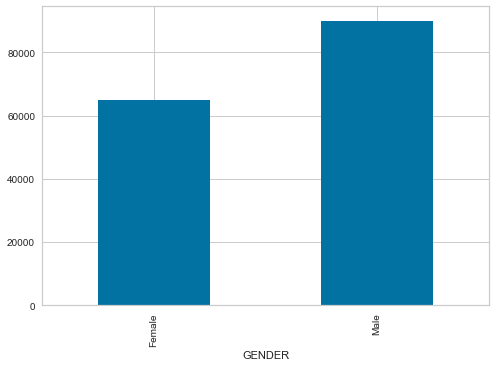

In [176]:
need_labels.groupby('GENDER').SALARY.median().plot(kind = 'bar')
# 0 = male 1 = female

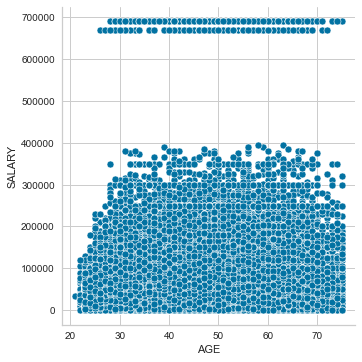

In [177]:
sns.relplot(x='AGE', y='SALARY', data=need_labels)

# Multiple Linear Regression

In [178]:
df1.corr().style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,AGE,ASDGRI,CLIC,CTZN,GENDER,MRDG,NBAMEMG,NDGMEMG,N2OCPRMG,RACETHM,SALARY
AGE,1.000000,0.091008,0.081292,-0.080807,-0.091979,0.112143,0.066251,0.070653,0.084702,0.075328,0.149206
ASDGRI,0.091008,1.000000,0.034605,-0.023812,0.013505,-0.123716,0.075135,0.041015,0.053261,0.025502,-0.072557
CLIC,0.081292,0.034605,1.000000,-0.131011,0.130223,0.123275,0.093929,0.182434,0.175809,0.092588,-0.003391
CTZN,-0.080807,-0.023812,-0.131011,1.000000,-0.069619,0.120903,-0.086027,-0.144383,-0.188345,-0.494057,0.053462
GENDER,-0.091979,0.013505,0.130223,-0.069619,1.000000,0.029515,0.061415,0.096622,0.162084,0.001456,-0.213667
MRDG,0.112143,-0.123716,0.123275,0.120903,0.029515,1.000000,-0.092006,0.103670,-0.046098,-0.053513,0.190466
NBAMEMG,0.066251,0.075135,0.093929,-0.086027,0.061415,-0.092006,1.000000,0.695565,0.296531,0.078817,-0.058215
NDGMEMG,0.070653,0.041015,0.182434,-0.144383,0.096622,0.103670,0.695565,1.000000,0.388832,0.094871,-0.015986
N2OCPRMG,0.084702,0.053261,0.175809,-0.188345,0.162084,-0.046098,0.296531,0.388832,1.000000,0.086757,-0.083084
RACETHM,0.075328,0.025502,0.092588,-0.494057,0.001456,-0.053513,0.078817,0.094871,0.086757,1.000000,-0.043790


In [179]:
X = df1[["AGE", "ASDGRI", "CLIC", "CTZN", "GENDER", "MRDG", "NBAMEMG", "NDGMEMG", "N2OCPRMG", "RACETHM"]]
y = df1["SALARY"].values.reshape(-1, 1)
print(X.shape, y.shape)

(73629, 10) (73629, 1)


In [180]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [181]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [182]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [183]:
# Create the model using LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

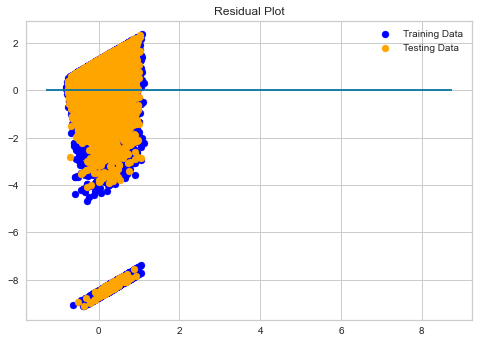

In [184]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [185]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8447267056682979, R2: 0.10073285544324528


In [186]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8454525717423785, R2: 0.09996012325970116


In [187]:
# Ridge model
# a method of estimating the coefficients of multiple-regression models 
# in scenarios where independent variables are highly correlated.
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8447267044683886, R2: 0.1007328567206276


In [188]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8453287733792106, R2: 0.10009191476078627


# Machine Learning Code From Stanford Class
## PCA
## Clustering

In [189]:
import pydotplus
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

In [190]:
#PCA
X = df1
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,AGE,ASDGRI,CLIC,CTZN,GENDER,MRDG,NBAMEMG,NDGMEMG,N2OCPRMG,RACETHM,SALARY,SALARYG,AGEG
0,-0.486559,-0.413770,-0.763685,-0.47574,-0.890057,0.484849,-1.859799,-1.984277,-2.136001,-0.689212,-0.578137,-0.576799,-0.537670
1,-0.331252,2.416803,1.309440,-0.47574,1.123524,0.484849,-0.258811,1.103459,0.792598,0.559259,-0.959305,-1.491826,-0.537670
2,-0.020639,-0.413770,-0.763685,-0.47574,-0.890057,0.484849,-0.258811,1.103459,0.792598,-0.064976,1.620908,1.253254,0.185572
3,0.445282,-0.413770,-0.763685,-0.47574,1.123524,-0.806720,-1.326137,-1.469655,-1.647901,0.559259,-0.751905,-1.034312,0.185572
4,-0.408906,-0.413770,1.309440,-0.47574,1.123524,3.067989,-0.258811,1.103459,0.792598,-1.937683,-0.284931,-0.119286,-0.537670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73624,-1.107787,-0.413770,-0.763685,-0.47574,1.123524,-0.806720,1.342176,1.103459,0.792598,-1.937683,-0.548816,-0.576799,-1.260913
73625,0.911203,-0.413770,-0.763685,-0.47574,-0.890057,-0.806720,-0.258811,-0.440409,0.792598,0.559259,-1.241516,-1.949339,0.908815
73626,-1.263093,-0.413770,-0.763685,-0.47574,1.123524,-0.806720,-1.326137,-1.469655,-1.159801,0.559259,-0.695419,-1.034312,-1.260913
73627,-0.719519,-0.413770,-0.763685,-0.47574,1.123524,0.484849,-1.326137,0.588836,0.304498,0.559259,-0.446194,-0.576799,-0.537670


In [191]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.043860,-0.517511,-1.701557,-0.465906,0.471052,-0.462087,-0.988150,0.086596,0.067360,-1.213854,0.190582,0.234394,0.025645
1,-2.023739,-1.700446,-0.513749,0.346272,0.727641,2.260455,-0.798136,0.625411,-0.635405,-0.029340,-0.652240,0.400944,0.143409
2,0.025550,1.579505,1.536808,-0.797147,-0.466901,-0.473631,0.443640,0.184346,-1.126717,-0.374347,-0.694662,0.282091,-0.142582
3,1.157415,-0.778170,-2.578949,-0.494157,0.523650,-0.562133,0.479557,0.741280,1.151788,-0.031577,-0.123129,0.357708,0.166947
4,-0.549580,-0.247162,1.759251,1.489823,2.933580,0.361493,-0.467553,0.362199,-0.973971,-1.801038,-0.114188,-0.155737,0.111754
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73624,-0.654143,-2.265899,1.584207,1.049734,-0.711127,-0.530340,1.294503,0.197460,0.203971,-1.413593,0.146959,0.036108,0.091795
73625,-0.977287,-0.544585,-2.295915,0.150704,-0.668408,-1.472840,-0.180487,-0.701124,-0.858321,0.097674,0.103624,0.423625,-0.030978
73626,1.753371,-2.365330,-1.368533,-1.100234,0.549309,-0.199020,0.516734,0.644395,0.561000,0.047800,-0.010541,0.339823,-0.017480
73627,0.078278,-1.246583,-0.207973,-0.503895,1.053874,-0.501829,0.418442,1.068871,-0.684787,-0.041076,-1.127044,0.181953,-0.127652


In [192]:
pca.explained_variance_ratio_

array([0.18224908, 0.17618799, 0.1174178 , 0.10519594, 0.09076055,
       0.07351707, 0.06169587, 0.0601325 , 0.05342858, 0.0374102 ,
       0.02024527, 0.01950286, 0.00225628])

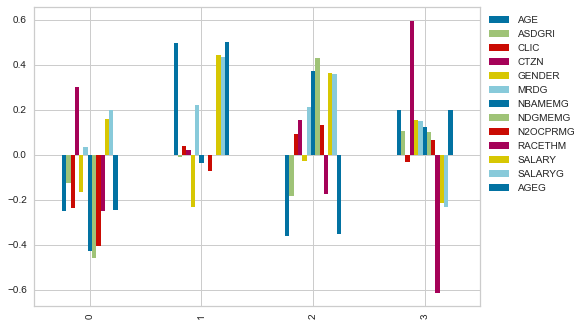

In [193]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

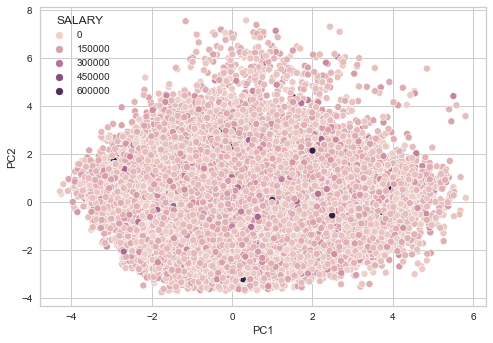

In [194]:
sns.scatterplot(x='PC1', y='PC2', 
                data=pca_X.assign(SALARY=X.SALARY), 
                hue='SALARY')

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

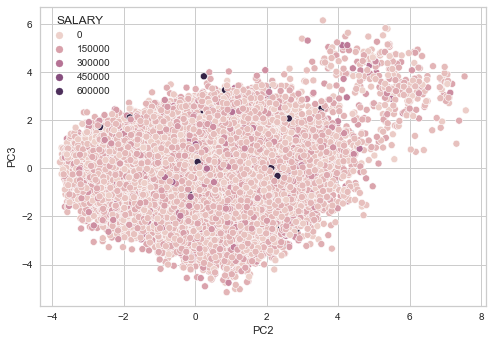

In [195]:
sns.scatterplot(x='PC2', y='PC3', 
                data=pca_X.assign(SALARY=X.SALARY), 
                hue='SALARY')

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


<AxesSubplot:>

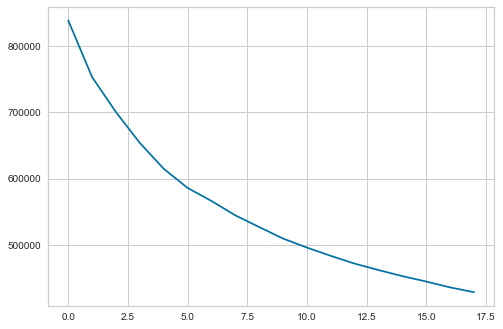

In [196]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=0)
    k.fit(X_std)
    inerts.append(k.inertia_)
    
pd.Series(inerts).plot()

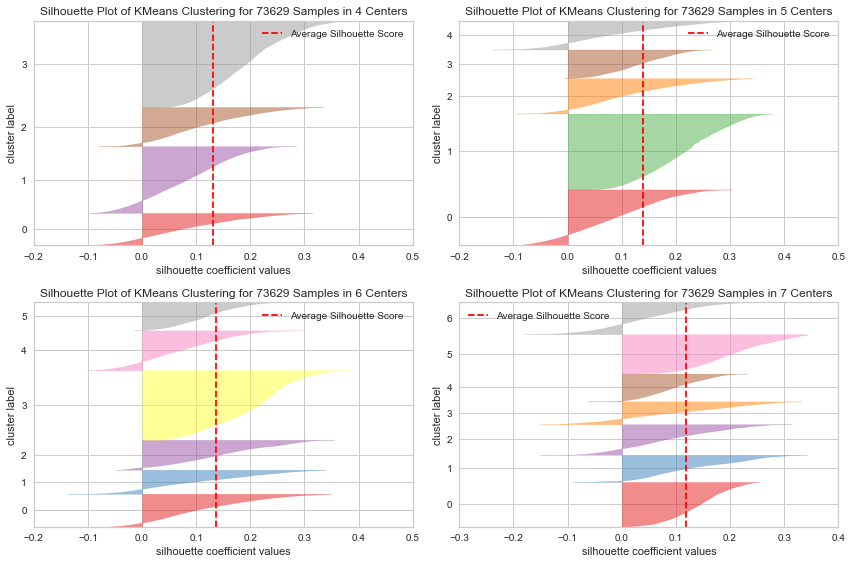

In [197]:
# start, end = 4, 8
# cols = 2
# rows = ((end - start) // cols)
# fix, axes = plt.subplots(rows, cols, figsize=(12,8))
# axes = axes.reshape(cols * rows)
# for i, k in enumerate(range(start, end), 0):
#     ax = axes[i]
#     sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=0), ax=ax)
#     sil.fit(X_std)
#     sil.finalize()
# plt.tight_layout()